In [1]:
import six.moves.cPickle as pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# transforms an image's numerical label to a vector of length 10 comprised of 0s,
# except for the label's numerical index is represented as a 1
# example: label "5" is represented as a one-hot encoded vector of [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
def one_hot_encode_label(label):
    encoded_label = np.zeros((10, 1), dtype=int)
    encoded_label[label] = 1
    return encoded_label

In [3]:
# create pairs of features and labels.
def shape_data(data):

    # flatten 28×28 pixel input image into a 784 length vector
    # vector values represents a grayscale value between 0 and 1
    # 0 indicating white and 1 indicating black 
    features = [np.reshape(x, (784, 1)) for x in data[0]]
    labels = [one_hot_encode_label(y) for y in data[1]]
        
    return zip(features, labels)

# unzip and unpickle the image data set, yielding the training and test data
def load_data():
    with gzip.open('./data/mnist.pkl.gz', 'rb') as f:
        train_data, validation_data, test_data = pickle.load(f, encoding="latin1")
        f.close()

    return shape_data(train_data), shape_data(test_data)

In [4]:
# classifies numbers based on label and by averaging their 784 length vector
# allows for comparing images based on an image's numerical average
def average_digit(data, digit):
    # filter values when the digit argument matches the index of the maximum value (the hot-encoded label) within the vector
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)

train, test = load_data()
avg_eight = average_digit(train, 8)

[array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]]), array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]]), array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]]), array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]]), array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])]
[array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]]), array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]]), array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]]), array([[1],
       [0]

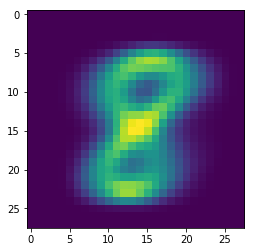

In [5]:
img = (np.reshape(avg_eight, (28,28)))
plt.imshow(img)
plt.show()